# HW 2 Simulation 555

1. Review lecture notes 1-4.

2. Write a code for one of the "static simulation" problems (your choice) from handouts 1-2.

Provide a brief discussion of the obtained statistical data. Visualize it graphically.

3. Complete two problems attached.

4. Write a code for one of the first three "dynamic simulation" problems (your choice) from handout 3.

Provide a brief discussion of the obtained statistical data. Visualize it graphically.

5. Modify problem 4 in handout 3:
   Assume now that if a service cannot be completed the second day, there is 90% chance it will be finished at the end of the next day, in which case your total charge is $\$2,100$. In case if the service isn't finished in three days, the truck is returned in the condition "not fixed", and the company receives only $1,000. In addition to the previously asked questions, provide statistics on the total number of trucks remaining "not fixed" during the testing period.

---

Please submit one pdf document with the short description of each solution, your code, and graphs. Additionally submit either .py or .m files you created.


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

---

## 2\. Handout1-Problem 1

You operate an aircraft that flies two flights per day: an "outbound" flight from its base to a remote destination, and then and "inbound" flight back again.

The aircraft can carry a mix of passengers and freight: if configured for all passengers, the aircraft holds 216 seats. Each freight pallet you configure the aircraft to hold takes away 24 seats, and you are considering setting up the aircraft to hold 0, 1, 2, 3, 4, 5, or 6 freight pallets.

The split between seats and space for pallets must be decided once a year when the aircraft undergoes "heavy maintenance"; it cannot be changed for each flight.

You make a profit of $50 for each passenger carried (in either direction), and demand for seats on the outbound flight is Poisson with a mean of 160, while demand for seats on the inbound flight is Poisson with a mean of 159 (independent of the outbound flight).

Demand for freight carriage is independent of passenger demand and also independent between the inbound and outbound flights.（see Pallet_Table)

You make a profit $275 per pallet carried (in either direction). What aircraft configuprobn maximizes the average profit per day?


### Set the parameters of the problem and generate the random variables


In [2]:
N = 10000  # set the number of trials
n = (0, 1, 2, 3, 4, 5, 6)  # number of pallets considered

# seats_capacity = 216
# taken_by_each_pallet = 24
# passenger_profit = 50 / seat
# pallet_profit = 275 / pallet

In [3]:
# Create the pallets_Table for inboud and outbound demand discrete probability
pallets_table = pd.DataFrame(
    {
        'outbound_pallets_prob': [0.06, 0.08, 0.18, 0.2, 0.21, 0.16, 0.11],
        'inbound_pallets_prob': [0.07, 0.09, 0.18, 0.19, 0.17, 0.16, 0.14]
    },
    index=n)
pallets_table

,outbound_pallets_prob,inbound_pallets_prob
0,0.06,0.07
1,0.08,0.09
2,0.18,0.18
3,0.20,0.19
4,0.21,0.17
5,0.16,0.16
6,0.11,0.14


In [4]:
# genenerate the inbound and outbound demand random variables

demand_pal_out_rvs = stats.rv_discrete(
    name='Pal_Out_rvs',
    values=(n, pallets_table['outbound_pallets_prob'])).rvs(size=N)

demand_pal_in_rvs = stats.rv_discrete(
    name='Pal_In_rvs',
    values=(n, pallets_table['inbound_pallets_prob'])).rvs(size=N)


In [5]:
# Generate seats demand random variables

mu_out = 160  # demand for seats on the outbound flight is Poisson with a mean of 160

mu_in = 159  # demand for seats on the inbound flight is Poisson with a mean of 159

demand_seats_out_rvs = stats.poisson(mu_out).rvs(size=N)
demand_seats_in_rvs = stats.poisson(mu_in).rvs(size=N)

### Considering setting up the aircraft to hold 0, 1, 2, 3, 4, 5, or 6 freight pallets


In [6]:
# When there is 0 freight pallet in the plane.
# Pallets sale = min(demand_pallets and 0),thus:

pallets_out_sale = 0
pallets_in_sale = 0

In [7]:
# number_of_seats_In_and_Out_available = seats_capacity = 216
seats_out_sale = np.minimum(demand_seats_out_rvs, np.ones(N) * 216)
seats_in_sale = np.minimum(demand_seats_in_rvs, np.ones(N) * 216)


In [8]:
profit_Out = seats_out_sale * 50
profit_In = seats_in_sale * 50

profit_total = profit_Out + profit_In
mean_profit_0 = np.mean(profit_total)

print(
    f"When there is 0 freight pallet in the plane.\nthe mean of the profit is {mean_profit_0}"
)


When there is 0 freight pallet in the plane.
the mean of the profit is 15949.855


In [9]:
# Create simulation function for the mean profit of each scenario from 1 to 6 pallets


def mean_profit(i, seats_capacity=216):
    """Simulate the actuall sales of pallets and seats numbers for each scenario,where i = numbers of palltes"""

    pallets_out_sale = np.minimum(demand_pal_out_rvs, np.ones(N) * i)
    pallets_in_sale = np.minimum(demand_pal_in_rvs, np.ones(N) * i)

    # Next, calculate the available seats left for passengers:
    seats_out_available = seats_capacity - pallets_out_sale * 24
    seats_out_sale = np.minimum(demand_seats_out_rvs, seats_out_available)

    seats_in_available = seats_capacity - pallets_in_sale * 24
    seats_in_sale = np.minimum(demand_seats_in_rvs, seats_in_available)
    """calculate the profit"""
    profit_out = seats_out_sale * 50 + pallets_out_sale * 275
    profit_in = seats_in_sale * 50 + pallets_in_sale * 275

    profit_total = profit_out + profit_in
    mean_profit = np.mean(profit_total).astype(int)
    return mean_profit

When there are 0 pallets in the plane:
    The mean of the profit is $15949.
When there are 1 pallets in the plane:
    The mean of the profit is $16464.
When there are 2 pallets in the plane:
    The mean of the profit is $16770.
When there are 3 pallets in the plane:
    The mean of the profit is $16179.
When there are 4 pallets in the plane:
    The mean of the profit is $15320.
When there are 5 pallets in the plane:
    The mean of the profit is $14784.
When there are 6 pallets in the plane:
    The mean of the profit is $14544.


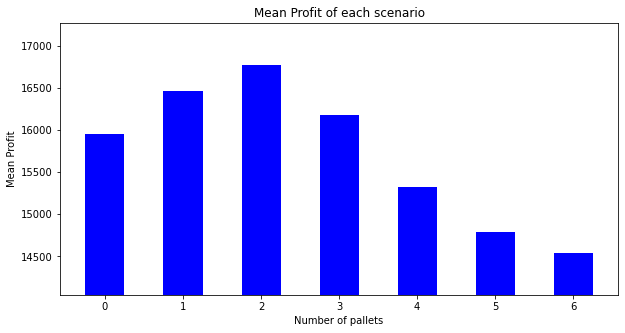

In [10]:
result_profits = np.empty(shape=(7, 1), dtype=int)

_, ax = plt.subplots(figsize=(10, 5))

for i in range(0, 7):
    result_profits[i] = mean_profit(i)

    print(
        f"When there are {i} pallets in the plane:\n    The mean of the profit is ${mean_profit(i).round(2)}."
    )
    ax.bar(i, result_profits[i], color='blue', width=0.5)
    ax.set(title='Mean Profit of each scenario',
           xlabel='Number of pallets',
           ylabel='Mean Profit',
           ylim=(np.min(result_profits) - 500, np.max(result_profits) + 500))


In [11]:
print(
    f"\nHence the highest profit is ${np.max(result_profits)},when there are {np.argmax(result_profits)} pallets assembeld in the plane."
)


Hence the highest profit is $16770,when there are 2 pallets assembeld in the plane.


---

## 3\. Complete two problems attached.

### Q3-Problem 1

You make a perishable, volatile chemical for which you charge $2.25 per liter.

You have 75 regular customers for the chemical, each of whom has an independent 90% chance of placing an order on any given day. You also get an average of 30 orders per day from other, non-regular customers; assume the number of non-regular customers per day has a Poisson distribution.

Every order is for one 20-liter container. You produce the chemical by a process that produces 600 liters of the chemical at a cost of $1300.

Each day, you can run the process any whole number of times. Because it is so unstable, any chemical left unsold at the end of the day must be recycled, at a cost of $0.35 per liter.

What is the best number of times to run the process?

(Consider four possible policies of running the process 1, 2, 3 or 4 times.)


### Define the scenarios


In [12]:
# produce the chemical by a process that produces 600 liters of the chemical at a cost of $1300.
# Consider four possible policies of running the process 1, 2, 3 or 4 times.
# The process is described by the following dictionaries:
scen_param = {
    1: (600, 1300),
    2: (1200, 2600),
    3: (1800, 3900),
    4: (2400, 5200)
}


In [13]:
class chemSim:
    """simulate the chemical producing process for 100 days
    where : scen_param = { 1:(600, 1300), 2:(1200, 2600), 3:(1800, 3900), 4:(2400, 5200)}
    """

    def __init__(self, scen_param):
        self.days = 100
        self.scen_param = {
            1: (600, 1300),
            2: (1200, 2600),
            3: (1800, 3900),
            4: (2400, 5200)
        }

    def chem_df(self, i):
        regular_order = stats.binom(n=75, p=0.9).rvs(size=self.days)
        #75 regular customers for the chemical, each of whom has an independent 90% chance of placing an order on any given day.

        non_regular_order = stats.poisson(mu=30).rvs(
            size=self.days
        )  #an average of 30 orders per day from other, non-regular customers

        chem_prod_sim_df = pd.DataFrame({
            'regular_L': regular_order * 20,
            'non_regular_L': non_regular_order * 20,
            'left_cost': np.zeros(self.days),
            'produce': self.scen_param[i][0],
            'cost': self.scen_param[i][1],
            'sale': np.zeros(self.days)
        })  # Create the simulation dataframe

        # analyze the demand and the production of the chemical:
        chem_prod_sim_df_1 = chem_prod_sim_df.copy()
        # if the demand is greater than the production,all the chemicals will be sold in the end.
        chem_prod_sim_df_1.query(expr='regular_L + non_regular_L > produce',
                                 inplace=True)
        chem_prod_sim_df_1['sale'] = chem_prod_sim_df_1['produce'] * 2.25

        chem_prod_sim_df_2 = chem_prod_sim_df.copy()
        # if the demand is less than the production, there will be unsold chemicals which need to be handled in the end, the recycle fee should be considered.
        chem_prod_sim_df_2.query(expr='regular_L + non_regular_L <= produce',
                                 inplace=True)
        # actuall sale of the chemicals
        chem_prod_sim_df_2['sale'] = (
            chem_prod_sim_df_2['regular_L'] +
            chem_prod_sim_df_2['non_regular_L']) * 2.25

        # the recycle fee for the chemical left:
        chem_prod_sim_df_2['left_cost'] = (
            chem_prod_sim_df_2['produce'] -
            (chem_prod_sim_df_2['regular_L'] +
             chem_prod_sim_df_2['non_regular_L'])) * 0.35

        # combine the two dataframes of codndiditons together.
        chem_prod_sim_df = pd.concat([chem_prod_sim_df_1, chem_prod_sim_df_2])
        chem_prod_sim_df['profit'] = chem_prod_sim_df['sale'] - (
            chem_prod_sim_df['cost'] + chem_prod_sim_df['left_cost'])

        return chem_prod_sim_df

#### Simulate the process for each of the four policies for 100 days:


In [14]:
# 1 time of the producing proces in 100 days.
chemSim(1).chem_df(1)

,regular_L,non_regular_L,left_cost,produce,cost,sale,profit
0,1360,540,0.0,600,1300,1350.0,50.0
1,1380,460,0.0,600,1300,1350.0,50.0
2,1420,680,0.0,600,1300,1350.0,50.0
3,1380,540,0.0,600,1300,1350.0,50.0
4,1360,600,0.0,600,1300,1350.0,50.0
...,...,...,...,...,...,...,...
95,1420,540,0.0,600,1300,1350.0,50.0
96,1320,480,0.0,600,1300,1350.0,50.0
97,1400,620,0.0,600,1300,1350.0,50.0
98,1360,640,0.0,600,1300,1350.0,50.0


In [15]:
# 2 times of the producing proces in 100 days.
chemSim(2).chem_df(2)

,regular_L,non_regular_L,left_cost,produce,cost,sale,profit
0,1340,540,0.0,1200,2600,2700.0,100.0
1,1340,820,0.0,1200,2600,2700.0,100.0
2,1280,620,0.0,1200,2600,2700.0,100.0
3,1400,660,0.0,1200,2600,2700.0,100.0
4,1360,640,0.0,1200,2600,2700.0,100.0
...,...,...,...,...,...,...,...
95,1280,560,0.0,1200,2600,2700.0,100.0
96,1380,720,0.0,1200,2600,2700.0,100.0
97,1260,600,0.0,1200,2600,2700.0,100.0
98,1380,600,0.0,1200,2600,2700.0,100.0


In [16]:
# 3 times of the producing proces in 100 days.
chemSim(3).chem_df(3)

,regular_L,non_regular_L,left_cost,produce,cost,sale,profit
0,1240,800,0.0,1800,3900,4050.0,150.0
1,1280,680,0.0,1800,3900,4050.0,150.0
2,1400,740,0.0,1800,3900,4050.0,150.0
3,1340,580,0.0,1800,3900,4050.0,150.0
4,1300,660,0.0,1800,3900,4050.0,150.0
...,...,...,...,...,...,...,...
75,1260,520,7.0,1800,3900,4005.0,98.0
81,1360,440,0.0,1800,3900,4050.0,150.0
82,1240,460,35.0,1800,3900,3825.0,-110.0
87,1360,440,0.0,1800,3900,4050.0,150.0


In [17]:
# 4 times of the producing proces in 100 days.
chemSim(4).chem_df(4)

,regular_L,non_regular_L,left_cost,produce,cost,sale,profit
0,1440,540,147.0,2400,5200,4455.0,-892.0
1,1320,500,203.0,2400,5200,4095.0,-1308.0
2,1200,720,168.0,2400,5200,4320.0,-1048.0
3,1400,580,147.0,2400,5200,4455.0,-892.0
4,1280,740,133.0,2400,5200,4545.0,-788.0
...,...,...,...,...,...,...,...
95,1320,840,84.0,2400,5200,4860.0,-424.0
96,1460,740,70.0,2400,5200,4950.0,-320.0
97,1340,660,140.0,2400,5200,4500.0,-840.0
98,1400,580,147.0,2400,5200,4455.0,-892.0


The mean proifts of each scenatio is:[[  50]
 [ 100]
 [ 137]
 [-944]]

So,if there are 1 times of running the process,the highest profit is $4639376119261298688.


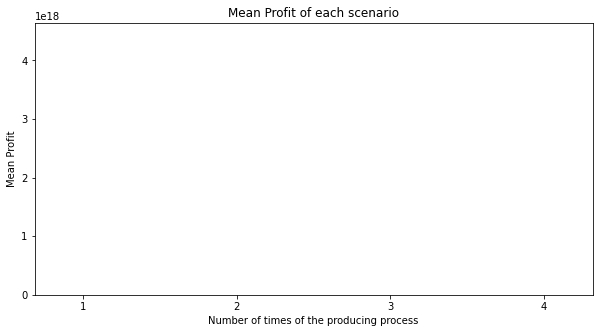

In [18]:
result_Mean_profits = np.empty(shape=(5, 1), dtype=int)

_, ax = plt.subplots(figsize=(10, 5))

for i in range(1, 5):
    result_Mean_profits[i] = np.mean(chemSim(i).chem_df(i)['profit'])

    ax.bar(i, result_Mean_profits[i], color='blue', width=0.3)
    ax.set(ylim=(np.min(result_Mean_profits) - 100,
                 np.max(result_Mean_profits) + 100),
           xticks=np.arange(1, 5),
           xticklabels=['1', '2', '3', '4'],
           title='Mean Profit of each scenario',
           xlabel='Number of times of the producing process',
           ylabel='Mean Profit')

print(f"The mean proifts of each scenatio is:{result_Mean_profits[1:]}")

print(
    f"\nSo,if there are {np.argmax(result_Mean_profits) + 1} times of running the process,the highest profit is ${np.max(result_Mean_profits)}."
)

### Q3-Problem 2

The management of a hotel is considering renting a portable filtprobn unit to process the water to make it drinkable. There are three possible filtprobn units:

<style>
table
{
    margin: auto;
}
</style>

|                    |  Unit1  |  Unit2   |  Unit3   |
| :----------------: | :-----: | :------: | :------: |
| Capacity (Gallons) |   800   |   900    |   1000   |
|        Cost        | $\$800$ | $\$1000$ | $\$1300$ |

They are also considering not renting a filtprobn unit. If they don’t rent a unit, or if the unit’s capacity turns out to be insufficient to meet the hotel guests’ demand for water, the hotel will have to supply bottled water to every occupied room.Providing bottled water will cost the hotel a flat fee of $450, plus $5 per occupied room.The hotel has 250 rooms.

At present, they have 200 room reservations they consider “firm”, with a negligible chance of cancellation.

They have another 35 reservations they consider “doubtful”, each with an independent 65% chance of resulting in an occupied room.

They also expect to get some “last minute” requests for rooms, which they estimate to be Poisson with a mean of 30.

Occupied rooms consume random amounts of water independently from one another.

Each occupied room consumes the amount of water that is distributed according to the normal distribution with an average of 4 gallons of water and a standard deviation of 3.1.

Find an optimal plan for the management and also the probability of not having enough filtered water to meet this optimal demand.


#### Analysis

As the bottle water is the suppliment of the hotel filter-drinking system,there are four scenarios:

- Unit1, Unit2, Unit3 and All bottle water with no unit.

Thus we can define the scenarios(scenario,capacity of water, cost) as below:


In [19]:
# define the scenario of bottle water only later since it meet all the demand of water consumption in the hotel.
vol = []

scen_param = {1: (800, 800), 2: (900, 1000), 3: (1000, 1300), 4: (vol, 450)}

In [20]:
# we would like to simulate each condition in 1000 days
num_days = 1000

total_rooms = 250
firm_rooms = 200
# geneerate the daily demand of the rooms in the hotel in the 1000 days
# doubtful rooms:
binom_rooms = stats.binom(n=35, p=0.65).rvs(size=num_days)
# As the usual rooms are set, the last minute rooms is determined by the minimal number between rooms left and the demand of the last minute rooms,which simulated by poisson distribution as the mu = 30.
lastMin_rooms = np.minimum(50 - binom_rooms,
                           stats.poisson(mu=30).rvs(size=num_days))

day_rooms = 200 + binom_rooms + lastMin_rooms

In [21]:
# generate the daily demand of water in EVERY room of the hotel for 1000 days
room_consumption = [
    np.maximum(stats.norm(loc=4, scale=3.1).rvs(size=day_room).astype(int), 0)
    for day_room in day_rooms
]

# sum up the daily demand of the water in the hotel for 1000 days
water_consumption = (room_consum.sum() for room_consum in room_consumption)

In [22]:
# Create the water consumption dataframe

water_consumption_df = pd.DataFrame({
    'room_booked': day_rooms,
    'water_consumption': water_consumption
})

# Calculate the water shortage of each scenrios:

water_consumption_df[
    'shortage_Unit1_800'] = water_consumption_df['water_consumption'] - 800
water_consumption_df['shortage_Unit1_800_prob'] = round(
    water_consumption_df['shortage_Unit1_800'] /
    water_consumption_df['water_consumption'], 2)

water_consumption_df[
    'shortage_Unit2_900'] = water_consumption_df['water_consumption'] - 900

water_consumption_df['shortage_Unit2_900_prob'] = round(
    water_consumption_df['shortage_Unit2_900'] /
    water_consumption_df['water_consumption'], 2)

water_consumption_df[
    'shortage_Unit3_1000'] = water_consumption_df['water_consumption'] - 1000

water_consumption_df['shortage_Unit3_1000_prob'] = round(
    water_consumption_df['shortage_Unit3_1000'] /
    water_consumption_df['water_consumption'], 2)

# Just bottle water scenario, without filters.
water_consumption_df[
    'bottle_water_fee'] = water_consumption_df['room_booked'] * 5


In [102]:
water_consumption_df

,room_booked,water_consumption,shortage_Unit1_800,shortage_Unit1_800_prob,shortage_Unit2_900,shortage_Unit2_900_prob,shortage_Unit3_1000,shortage_Unit3_1000_prob,bottle_water_fee
0,250,916,116,0.13,16,0.02,-84,-0.09,1250
1,250,902,102,0.11,2,0.00,-98,-0.11,1250
2,243,896,96,0.11,-4,-0.00,-104,-0.12,1215
3,250,833,33,0.04,-67,-0.08,-167,-0.20,1250
4,250,953,153,0.16,53,0.06,-47,-0.05,1250
...,...,...,...,...,...,...,...,...,...
995,250,879,79,0.09,-21,-0.02,-121,-0.14,1250
996,248,978,178,0.18,78,0.08,-22,-0.02,1240
997,247,929,129,0.14,29,0.03,-71,-0.08,1235
998,250,969,169,0.17,69,0.07,-31,-0.03,1250


In [23]:
water_consumption_df.describe()

,room_booked,water_consumption,shortage_Unit1_800,shortage_Unit1_800_prob,shortage_Unit2_900,shortage_Unit2_900_prob,shortage_Unit3_1000,shortage_Unit3_1000_prob,bottle_water_fee
count,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000
mean,248.760000,920.66900,120.66900,0.129120,20.66900,0.019990,-79.33100,-0.088730,1243.800000
std,2.483257,45.09389,45.09389,0.042852,45.09389,0.048351,45.09389,0.053525,12.416286
min,234.000000,779.00000,-21.00000,-0.030000,-121.00000,-0.160000,-221.00000,-0.280000,1170.000000
25%,249.000000,891.00000,91.00000,0.100000,-9.00000,-0.010000,-109.00000,-0.120000,1245.000000
50%,250.000000,920.00000,120.00000,0.130000,20.00000,0.020000,-80.00000,-0.090000,1250.000000
75%,250.000000,951.00000,151.00000,0.160000,51.00000,0.050000,-49.00000,-0.050000,1250.000000
max,250.000000,1061.00000,261.00000,0.250000,161.00000,0.150000,61.00000,0.060000,1250.000000


In [24]:
# calculate the bottle cost of the hotel:
bottle_water_mean = water_consumption_df['bottle_water_fee'].mean() + 450
bottle_water_mean

1693.8

In [25]:
# Calculate the total cost of each scenarios where:
# scen_param = {1: (800, 800), 2: (900, 1000), 3: (1000, 1300), 4: (vol, 450)}
uinit_1_cost = scen_param[1][1] + bottle_water_mean
uinit_2_cost = scen_param[2][1] + bottle_water_mean
uinit_3_cost = scen_param[3][1] + bottle_water_mean
all_water_cost = bottle_water_mean

cost_ls = [uinit_1_cost, uinit_2_cost, uinit_3_cost, all_water_cost]

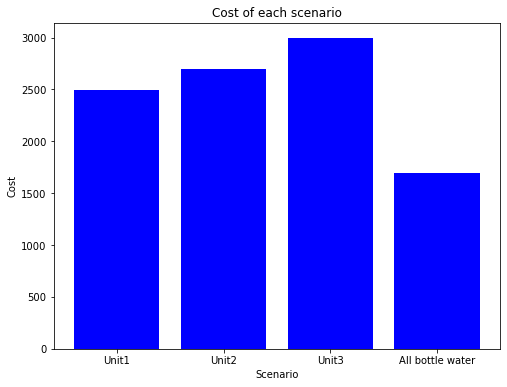

The lowest cost of each scenario is $1693.8,which is the "All bottle water" scenario is prefered.


In [26]:
labels_4 = ['Unit1', 'Unit2', 'Unit3', 'All bottle water']

_, ax = plt.subplots(figsize=(8, 6))

ax.bar(range(4), cost_ls, color='blue')
ax.set(xticks=np.arange(4),
       xticklabels=labels_4,
       xlabel='Scenario',
       ylabel='Cost',
       title='Cost of each scenario')

plt.show()

print(
    f"The lowest cost of each scenario is ${np.min(cost_ls)},which is the \"{labels_4[np.argmin(cost_ls)]}\" scenario is prefered."
)


---

## 4\. Write a code for one of the first three "dynamic simulation" problems (your choice) from handout 3.


### Handout 3 Problem 1

The Gotham Taxi Company has a fleet of 500 taxicabs. On any given day of use, a taxi has an 0.4% chance of breaking down. Broken-down taxis are towed overnight to the company repair shop. They return to service the day after they are fixed. Each day a taxi spends in the shop costs the company $350 in lost profits.
There are three mechanics Gotham is considering hiring to work in the repair shop: Larry, Moe and Curly. Each can fix one to three taxis per day.

- Larry would cost the company $300 per day. On any given day, there is 20% probability he can only fix one taxi, and a 40% probability he will be able to fix either two or three.

- Moe costs $250 per day. He has an equal probability of being able to fix either one, two, or three taxis on any given day.

- Curly costs $200 per day. On any given day, there is a 50% chance he can fix only one cab, a 30% chance he will be able fix two, and a 20% chance that he will be able to fix three.

The company may hire any combination of the three mechanics: any one, any two, or all three.

**Explain why you can tell, prior to performing any simulation, that the option of hiring just Curly will not be workable. ** `explain this`

Simulate each possibility by **200 trials of 100 days** each. Which possibility gives them the lowest average cost? What is the average number of taxis in the shop when you adopt this policy?


In [27]:
from itertools import product

In [28]:
# Create the assign matrix for mechanics
def assign_matrix(*cols):
    '''
    Assigns a 0-1 matrix for each cols
    '''
    matrix_0_1 = product([0, 1], repeat=len(cols))
    assign_df = pd.DataFrame([*matrix_0_1], columns=cols)
    return assign_df

In [29]:
hr_df = assign_matrix('Larry', 'Curly', 'Moe')
hr_df

,Larry,Curly,Moe
0,0,0,0
1,0,0,1
2,0,1,0
3,0,1,1
4,1,0,0
5,1,0,1
6,1,1,0
7,1,1,1


In [30]:
# drop the senario  [0 0 0], which means no one hired.

hr_df.drop(hr_df.iloc[:1].index, inplace=True)

hr_df.reset_index(drop=True, inplace=True)

In [31]:
# calcualte the wage for mechanics in different senarios
wage = [300, 200, 250]
hr_wage = hr_df.dot(wage)

cost_mechanics = hr_wage * 101
cost_mechanics

0    25250
1    20200
2    45450
3    30300
4    55550
5    50500
6    75750
dtype: int64

In [32]:
# generate repaired cars random variable for each mechanic
def repairs(names, cars, probs, days=101):
    repair_dict = {}

    for name, car, prob in zip(names, cars, probs):
        repair_dict[name] = stats.rv_discrete(values=(car,
                                                      prob)).rvs(size=days)

    repairshop_df = pd.DataFrame(repair_dict)

    return repairshop_df


# import the parameters of each mechanic
names = ('Larry', 'Curly', 'Moe')
cars = ((1, 2, 3), (1, 2, 3), (1, 2, 3))
probs = ((0.2, 0.4, 0.4), (1 / 3, 1 / 3, 1 / 3), (0.5, 0.3, 0.2))

# generate the repairing cars random variable for each mechanic
repair_df = repairs(names, cars, probs)

In [33]:
# combine the repairing cars random variable of each mechanic with the assignment matrix
repair_7 = repair_df.dot(hr_df.T).to_dict()

# generate the number of broken cars every day
repair_7['cars_broken'] = stats.binom(n=500, p=0.004).rvs(size=101)


In [34]:
# make the day start and end labels for the scenarios
ls_end = []
ls_start = []
for i in range(7):
    ls_end.append(f"{i}_end")
    ls_start.append(f"{i}_start")

In [35]:
# Build the simulation function with Python Dictionary approach (fast while take more Memory)


def repairTrials_dic():
    """initialize the simulation"""
    days = 101  # from day 0 to day 100

    # initialize every day start and end status with zero arrays
    for i, j in zip(ls_start, ls_end):
        repair_7[i] = np.zeros(days).astype(dtype=int)
        repair_7[j] = np.zeros(days).astype(dtype=int)
    """calculate the repir shop status at the start and end of each day"""
    for j in zip(ls_start, ls_end, range(7)):
        # j[0]: start day, j[1]: end day, j[2]: 7 scenarios in the repair_7
        for i in range(1, days):
            # the number of cars to be repaired at the start of the day is determined by the sum of the number of broken cars  at the end of the previous day and the number of cars at the repair shop at the end of the previous day
            repair_7[j[0]][i] = repair_7[j[1]][i -
                                               1] + repair_7['cars_broken'][i -
                                                                            1]
            # the number of broken cars at the end of the day is mainly determined by subtracting the number of cars can be repaired by the mechanic(s) from the number of cars to be repaired at the start of the day,however, is the number of subtraction is negative, which means the mechanic(s) can repair more cars than that in the day beginning, so the number of broken cars at the end of the day is zero, all cars are repaired.
            repair_7[j[1]][i] = np.maximum(
                (repair_7[j[0]][i] - repair_7[j[2]][i]), 0)

    sum_start = [
        repair_7[ls].sum() for ls in ls_start
    ]  # calculate the sum of the number of cars to be repaired at the start of the day
    """calculate the total cost of each scenario"""

    car_in_repair = [
        sum_start[i] / 100 for i in range(7)
    ]  # avergae the number of cars to be repaired at the start of the day
    cost_no_service = [sum_start[i] * 350 for i in range(7)
                       ]  # calculate the  no service cost of broken cars

    total_cost = cost_mechanics + cost_no_service
    # calculate the total cost of each scenario

    return total_cost, car_in_repair


In [36]:
# Make the simulation for 1000 times, then calculate the mean cost of each scenario
repairTrials_cost_ls = [repairTrials_dic()[0].values for i in range(1000)]
mean_cost_ls = np.mean(repairTrials_cost_ls, axis=0)
mean_cost_ls

array([644050., 270100., 118250., 156650., 124150., 120850., 144000.])

In [37]:
# calculate the mean number of cars to be repaired at the start of the day
car_in_repair_ls = np.empty(shape=(1000, 7))

for i in range(1000):
    car_in_repair_ls[i] = repairTrials_dic()[1]

mean_repair_ls = np.mean(car_in_repair_ls, axis=0)
mean_repair_ls

array([17.68,  7.14,  2.08,  3.61,  1.96,  2.01,  1.95])

### Visualization


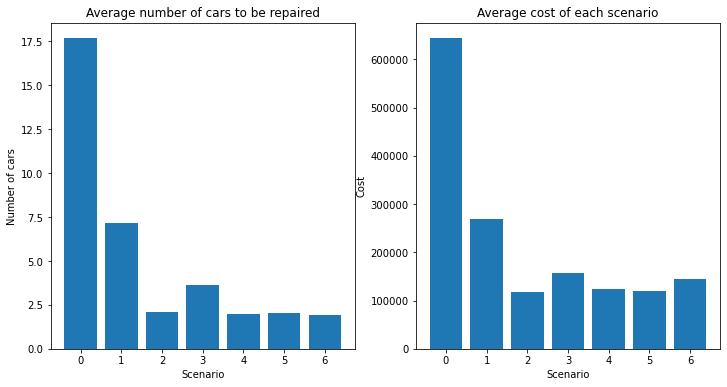

In [38]:
_, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].bar(range(7), mean_repair_ls)
axes[0].set(title='Average number of cars to be repaired',
            xlabel='Scenario',
            ylabel='Number of cars')

axes[1].bar(range(7), mean_cost_ls)
axes[1].set(title='Average cost of each scenario',
            xlabel='Scenario',
            ylabel='Cost')

plt.show()

In [39]:
sol = np.argmin(mean_cost_ls)
candidates = hr_df.columns[hr_df.loc[sol] == 1].tolist()

print(
    f"\nSo as the plots shows above the solution wiht lowes cost is the scenario {sol}, with the cost of ${mean_cost_ls[sol]}.\nMeanwhile the average number of cars in repair is {mean_repair_ls[sol].round(2)}.\nIn this scenario, the assign_matrix shows: \n{hr_df.loc[sol]==1},which means that {candidates} should be hired."
)



So as the plots shows above the solution wiht lowes cost is the scenario 2, with the cost of $118250.0.
Meanwhile the average number of cars in repair is 2.08.
In this scenario, the assign_matrix shows: 
Larry    False
Curly     True
Moe       True
Name: 2, dtype: bool,which means that ['Curly', 'Moe'] should be hired.


---

## 5. Modify problem 4 in handout 3:

Assume now that if a service cannot be completed the second day, there is 90% chance it will be finished at the end of the next day, in which case your total charge is $\$2,100$.

In case if the service isn't finished in three days, the truck is returned in the condition "not fixed", and the company receives only $1,000. In addition to the previously asked questions, provide statistics on the total number of trucks remaining "not fixed" during the testing period.

<style>
table
{
    margin: auto;
}
</style>

#### Original Problem

You manage the Big-Rig Service Center, which runs a thriving business performing repairs on large trucks.

The number of trucks arriving at the facility in need of repair each morning is well-modeled by a Poisson random variable with a mean value of 3.8.

If you have a free service bay available for an arriving truck, you start servicing it immediately.

Trucks that you cannot immediately accommodate with a free service bay do not wait, but go to a competitor’s facility instead.

You currently have 5 service bays, but since you frequently have to turn away business, you are considering expanding to **6, 7, or possibly 8 bays.**

Including debt service, insurance, and taxes, your costs for these expansion options, converted to a daily payment, would be:

|   Total Bays   | Daily Cost |
| :------------: | :--------: |
| 6 (add 1 bay)  |  $\$175$   |
| 7 (add 2 bays) |  $\$325$   |
| 8 (add 3 bays) |  $\$475$   |

Repairing each truck can take either 1, 2, or 3 full days; and you cannot tell in advance how long the work will take.

There is a 30% chance that a truck can be completed by the end of one day, in which case you charge $800.

Given that service cannot be completed the first day, there is 75% chance it will be finished at the end of the next day, in which case your total charge is $1,500.

Otherwise, completing the service takes three full days or work, for which you charge $2,100.

Your operating costs are $425 per occupied service bay per day.

Should you expand your facility, and if so, how many service bays should you add? With this number of bays, what is the average number of service requests denied per day?


In [48]:
# make 1000 trials for 100 days for different scenarios
N = 1000  # number of trials

cost_bay_scenarios = {5: 0, 6: 175, 7: 325, 8: 475}

# number of days
n = 100  

In [49]:
# initialize the simulation, create the the arrays for calculating with zeros:
# truck_arrivals_arr: the number of trucks arrived at the truck shop every day
# num_trucks_denied_arr: the number of trucks denied when they arrived at the truck shop every day
# start_1st_arr: the number of trucks at the truck shop at the start of first day
# completed_arr: the number of trucks completed their repair every day
# start_2nd_arr: the number of trucks at the truck shop at the start of second day
# completed_2nd_arr: the number of trucks completed their repair at the end of second day
# start_3rd_arr: the number of trucks at the truck shop at the start of third day
# completed_3rd_arr: the number of trucks completed their repair at the end of third day
# not_fixed_arr: the number of trucks not fixed at the end of the day
# free_bays_arr: the number of free bays at the end of the day

arr_names = [
    'truck_arrivals_arr', 'start_1st_arr', 'start_2nd_arr', 'start_3rd_arr',
    'completed_1st_arr', 'completed_2nd_arr', 'completed_3rd_arr',
    'not_fixed_arr', 'free_Bays_left_arr', 'num_trucks_denied_arr'
]

simu_arr = np.empty(shape=(n + 1, len(arr_names)), dtype=int)
simu_df = pd.DataFrame(simu_arr, columns=arr_names)
simu_df

,truck_arrivals_arr,start_1st_arr,start_2nd_arr,start_3rd_arr,completed_1st_arr,completed_2nd_arr,completed_3rd_arr,not_fixed_arr,free_Bays_left_arr,num_trucks_denied_arr
0,0,8433,0,4692123889,1080,4692122992,4294967327,4692123120,4294968375,4692122992
1,31,4692123680,4294968374,4692122992,4294967327,4692123712,141733921834,4692122992,4294967327,4692123744
2,4294967320,4307328048,4294967297,4692124016,85899345939,107374182419,4294967320,4307328048,4294967297,4692123824
3,85899345939,107374182419,4294968389,4692126408,4294967338,0,4294968390,4692126408,4294967338,4692123904
4,4294968391,4692126408,4294967338,4692123936,4294968392,4692126408,4294967338,4692123968,4294968393,4692126408
...,...,...,...,...,...,...,...,...,...,...
96,4294967355,4692131280,4307878704,4692131056,141733920788,214748364820,4692131344,-8751278440088338431,0,0
97,4294968564,4692131392,4294967355,0,1,4692131376,4294967320,4307878704,4294967297,1097
98,141733920788,171798691860,4307878704,4692131056,141733920788,214748364820,4692131504,1,0,0
99,4294968568,4692131552,4294967355,4692131408,1,4692131536,1,4692131504,1,4692129824


In [52]:
# Generate the truck arrivals rvs with Poisson distribution
simu_df['truck_arrivals_arr'] = [0, *stats.poisson(mu=3.8).rvs(size=n)]
simu_df

,truck_arrivals_arr,start_1st_arr,start_2nd_arr,start_3rd_arr,completed_1st_arr,completed_2nd_arr,completed_3rd_arr,not_fixed_arr,free_Bays_left_arr,num_trucks_denied_arr
0,0,8433,0,4692123889,1080,4692122992,4294967327,4692123120,4294968375,4692122992
1,4,4692123680,4294968374,4692122992,4294967327,4692123712,141733921834,4692122992,4294967327,4692123744
2,6,4307328048,4294967297,4692124016,85899345939,107374182419,4294967320,4307328048,4294967297,4692123824
3,6,107374182419,4294968389,4692126408,4294967338,0,4294968390,4692126408,4294967338,4692123904
4,3,4692126408,4294967338,4692123936,4294968392,4692126408,4294967338,4692123968,4294968393,4692126408
...,...,...,...,...,...,...,...,...,...,...
96,8,4692131280,4307878704,4692131056,141733920788,214748364820,4692131344,-8751278440088338431,0,0
97,6,4692131392,4294967355,0,1,4692131376,4294967320,4307878704,4294967297,1097
98,3,171798691860,4307878704,4692131056,141733920788,214748364820,4692131504,1,0,0
99,7,4692131552,4294967355,4692131408,1,4692131536,1,4692131504,1,4692129824


In [123]:
# Build the simulation function
def sim_bays_array(num_bays):
    # At the very beginning, the number of free bays is equal to the number of bays since there are no trucks arriving yet.
    free_Bays_left_arr[0] = num_bays

    for i in range(1, n + 1):
        start_1st_arr[i] = np.minimum(free_Bays_left_arr[i - 1],
                                      truck_arrivals_arr[i])
        # the number of trucks at the truck shop at the start of the day is the minimum of the number of free bays and the number of trucks arrived at the truck shop，if the number of trucks arrived at the truck shop is larger than the number of free bays, the trucks arrival will be denied.
        completed_1st_arr[i] = stats.binom(n=start_1st_arr[i], p=0.3).rvs()

        # the number of trucks completed their repair at the start of the day is the number of trucks at the truck shop at the start of the day, which is randomly generated by the binomial distribution from the nunmber of trucks in the beggining of the day with the probability of completion of the repair is 0.3

        start_2nd_arr[i] = start_1st_arr[i - 1] - completed_1st_arr[i - 1]
        # the number of trucks at the truck shop at the start of the second day is the number of trucks at the truck shop at the start of the first day minus the number of trucks completed their repair at the start of the first day
        completed_2nd_arr[i] = stats.binom(n=start_2nd_arr[i], p=0.75).rvs()
        # Similarly, the number of trucks completed their repair at the start of the second day is randomly generated by the binomial distribution from the nunmber of trucks in the beggining of the day with the probability of completion of the repair is 0.75

        start_3rd_arr[i] = start_2nd_arr[i - 1] - completed_2nd_arr[i - 1]
        completed_3rd_arr[i] = stats.binom(n=start_3rd_arr[i], p=0.9).rvs()

        # Not fixed
        not_fixed_arr[i] = start_3rd_arr[i - 1] - completed_3rd_arr[i - 1]
        # the number of trucks not fixed at the end of the day is the number of trucks at the truck shop at the start of the third day minus the number of trucks completed their repair at the start of the third day

        free_Bays_left_arr[i] = num_bays - (
            start_1st_arr[i] + start_2nd_arr[i] + start_3rd_arr[i]).sum() + (
                completed_1st_arr[i] + completed_2nd_arr[i] +
                completed_3rd_arr[i]).sum()
        # the number of free bays at the end of each day is the number of bays minus the sum of number of trucks at the truck shop at the start of each day plus the sum of number of trucks completed their repair at the start of each day

        num_trucks_denied_arr[i] = truck_arrivals_arr[i] - start_1st_arr[i]
        # if the number of trucks arrived at the truck shop is larger than the number of free bays, the trucks arrival will be denied.

        # Calculate the profit
        num_trucks_denied = num_trucks_denied_arr.sum()

        revenue = completed_1st_arr.sum() * 800 + completed_2nd_arr.sum(
        ) * 1500 + completed_3rd_arr.sum() * 2100 + not_fixed_arr.sum() * 1000

        cost_operating = (start_1st_arr + start_2nd_arr +
                          start_3rd_arr).sum() * 425

        # cost_bay_scenarios = {5: 0, 6: 175, 7: 325, 8: 475}
        cost_add = 100 * cost_bay_scenarios[num_bays]

        profit = revenue - cost_operating - cost_add

    return profit, num_trucks_denied


In [124]:
# Creat the results arrays for storing the results
results = [
    'results_5_bays', 'results_6_bays', 'results_7_bays', 'results_8_bays'
]

for name in results:
    exec(f"{name} = np.empty((N, 2), dtype=int)")


In [ ]:
for i in range(N):
    results_5_bays[i] = sim_bays_array(num_bays=5)
    results_6_bays[i] = sim_bays_array(num_bays=6)
    results_7_bays[i] = sim_bays_array(num_bays=7)
    results_8_bays[i] = sim_bays_array(num_bays=8)

### Visualization


In [ ]:
# make the result dataframe
mean_profits = []

mean_denials = []

index_names = ['5_bays', '6_bays', '7_bays', '8_bays']

results_lists = [
    results_5_bays, results_6_bays, results_7_bays, results_8_bays
]

for result in results_lists:
    mean_profits.append(np.array(result)[:, 0].mean())
    mean_denials.append(np.array(result)[:, 1].mean() / 100)

result_df = pd.DataFrame(
    {
        'mean_profits': list(mean_profits),
        'mean_denials': list(mean_denials)
    },
    index=index_names)

result_df


,mean_profits,mean_denials
5_bays,138885.975,1.43367
6_bays,143624.725,1.03858
7_bays,147321.125,0.70798
8_bays,147789.050,0.43645


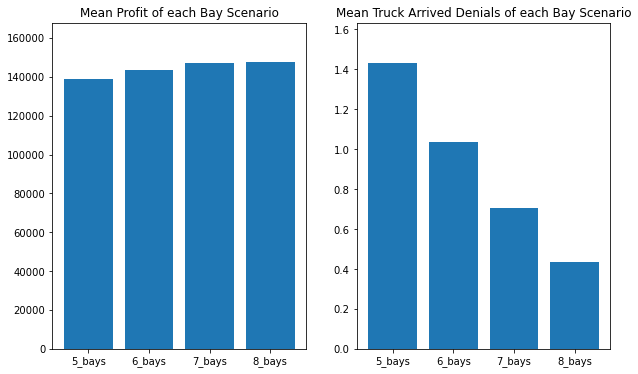

In [ ]:
_, axes = plt.subplots(1, 2, figsize=(10, 6))

axes[0].bar(result_df.index, result_df['mean_profits'])
axes[0].set(ylim=(0, np.max(mean_profits) + 20000),
            title='Mean Profit of each Bay Scenario')

axes[1].bar(result_df.index, result_df['mean_denials'])
axes[1].set(ylim=(0, np.max(mean_denials) + 0.2),
            title='Mean Truck Arrived Denials of each Bay Scenario')

plt.show()

In [ ]:
sol = np.argmax(mean_profits)

index_names[sol]

print(
    f"\nFrom the plots and dataframe, the best bay scenario is {index_names[sol]} with a mean profit of ${mean_profits[sol]} and a mean truck arrived denials of {mean_denials[sol]}."
)



From the plots and dataframe, the best bay scenario is 8_bays with a mean profit of $147789.05 and a mean truck arrived denials of 0.43645.


In [53]:
bay_dict = {}

arr_names = [
    'truck_arrivals_arr', 'start_1st_arr', 'start_2nd_arr', 'start_3rd_arr',
    'completed_1st_arr', 'completed_2nd_arr', 'completed_3rd_arr',
    'not_fixed_arr', 'free_Bays_left_arr', 'num_trucks_denied_arr'
]

for name in arr_names:
    bay_dict[name] = np.empty((n + 1, 1), dtype=int)

In [54]:
bay_dict['truck_arrivals_arr'] = stats.poisson(mu=3.8).rvs(size=n + 1)
bay_dict['truck_arrivals_arr'][0] = 0
bay_dict

{'truck_arrivals_arr': array([0, 4, 2, 1, 5, 4, 3, 5, 3, 4, 7, 1, 1, 5, 4, 5, 1, 4, 6, 2, 7, 4,
        5, 4, 3, 4, 3, 2, 4, 5, 4, 2, 1, 5, 1, 2, 5, 2, 2, 1, 4, 5, 1, 2,
        2, 1, 3, 3, 1, 1, 8, 2, 5, 2, 2, 2, 4, 3, 4, 1, 8, 5, 2, 4, 3, 1,
        6, 4, 2, 6, 5, 7, 2, 2, 1, 4, 2, 5, 3, 3, 1, 7, 2, 4, 4, 4, 5, 3,
        1, 1, 3, 7, 4, 4, 6, 4, 5, 2, 7, 4, 3]),
 'start_1st_arr': array([[4307216656],
        [5677089328],
        [5699192656],
        [5699191440],
        [5699192592],
        [5699191344],
        [5699193264],
        [5699192912],
        [5699194608],
        [5699194800],
        [5699173552],
        [5699173200],
        [5699172912],
        [5699172656],
        [5699173520],
        [5699173456],
        [5699170992],
        [5699173904],
        [5699173936],
        [5699173968],
        [5699172208],
        [5699170768],
        [5699171984],
        [5699064432],
        [5699064304],
        [5699064624],
        [5699066864],
        [5699066992],


In [168]:
def sim_bays_dict(num_bays):
    free_Bays_left_arr[0] = num_bays
    for day in range(1, n + 1):
        bay_dict['start_1st_arr'][day] = np.minimum(
            bay_dict['free_Bays_left_arr'][day],
            bay_dict['truck_arrivals_arr'][day])
        bay_dict['completed_1st_arr'][day] = stats.binom(
            n=bay_dict['start_1st_arr'][day], p=0.3).rvs()

        bay_dict['start_2nd_arr'][day] = bay_dict['start_1st_arr'][
            day - 1] - bay_dict['completed_1st_arr'][day - 1]
        bay_dict['completed_2nd_arr'][day] = stats.binom(
            n=bay_dict['start_2nd_arr'][day], p=0.75).rvs()

        bay_dict['start_3rd_arr'][day] = bay_dict['start_2nd_arr'][
            day - 1] - bay_dict['completed_2nd_arr'][day - 1]
        bay_dict['completed_3rd_arr'][day] = stats.binom(
            n=bay_dict['start_3rd_arr'][day], p=0.9).rvs()

        bay_dict['not_fixed_arr'][day] = bay_dict['start_3rd_arr'][
            day - 1] - bay_dict['completed_3rd_arr'][day - 1]

    return bay_dict


In [169]:
sim_bays_dict(6)

ValueError: Domain error in arguments.